In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import interpolate


In [8]:
def plot_timeseries(filename):
    with open(filename, 'rt') as fp:
        data = json.load(fp)

    power_ts = np.array(data['power_ts'])
    events = np.array(data['events'])
    events = events -  power_ts[0, 0]
    power_ts[:, 0] = power_ts[:, 0] - power_ts[0, 0]

    plt.plot(power_ts[:,0], power_ts[:, 1], '.-')
    for event in events:
        plt.axvline(x=event, color='r', linestyle='-')
    plt.xlabel('Time (s)')
    plt.ylabel('Power (W)')
    plt.show()

    interpolator = interpolate.interp1d(power_ts[:, 0], power_ts[:, 1], kind='linear', fill_value='extrapolate')

    # plot all runs on top of each other, each starting at the start time and ending at the end time
    for start_event, stop_event in zip(events[::2], events[1::2]):
        ts_new = np.arange(start_event, stop_event, 0.01)
        power_int = interpolator(ts_new)
        mean_trapz = np.trapz(power_int) / (len(power_int) - 1)
        mean_regular = np.mean(power_int)
        print(f'mean: {mean_regular}, median: {np.median(power_int)}')
        plt.plot(ts_new - ts_new[0], power_int)
    plt.xlabel('Time (s)')
    plt.ylabel('Power (W)')
    plt.show()

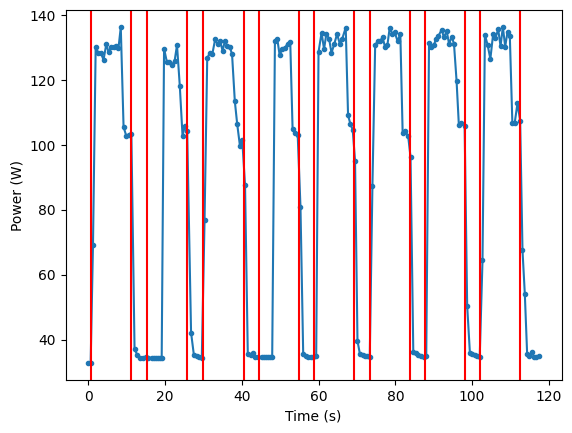

mean: 117.46038715459798, median: 128.43660793412658
mean: 86.25332770803111, median: 105.12696624604453
mean: 118.8942718895938, median: 128.3597667053307
mean: 90.49016922468044, median: 104.03829301300158
mean: 120.21944256116741, median: 131.33969038929348
mean: 120.30348951117722, median: 131.6342913896295
mean: 120.68123631764344, median: 131.23215980541158
mean: 120.62377678767866, median: 130.9345663851164


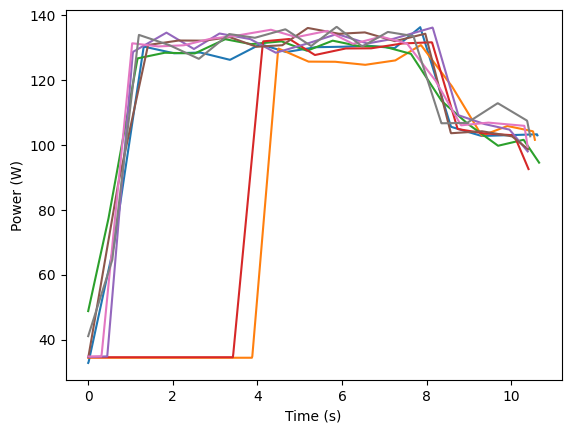

In [9]:
plot_timeseries('yolov5n-SiLU-416_power-3.json')

Power consumption is usually pretty consistent, but in 2 out of 8 of the trials it ramped up ~4 seconds late.

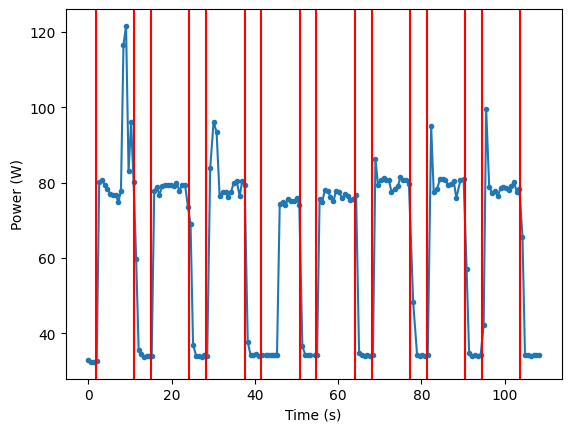

mean: 82.48541120658874, median: 79.03230223104403
mean: 76.15312810563393, median: 79.05170983668253
mean: 78.28021797836912, median: 78.39612022739148
mean: 56.80017804721346, median: 74.06970605113302
mean: 74.3178339775887, median: 76.2251146559134
mean: 77.14287582713206, median: 80.40753896502369
mean: 77.14066045442063, median: 79.70790659968377
mean: 76.64814899910306, median: 78.25323786642535


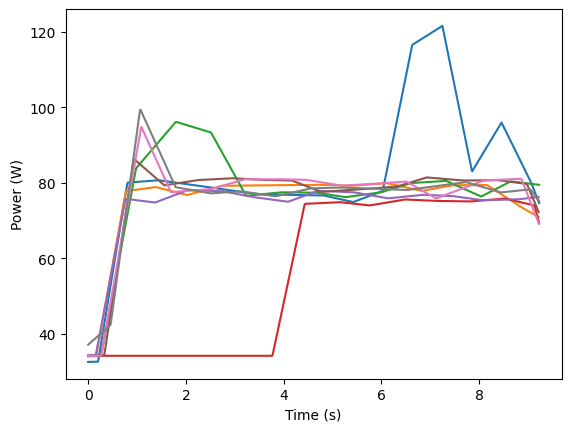

In [10]:
plot_timeseries('yolov5n-SiLU-416_power-nopre-nopost-1.json')

Even without the extra complexity of pre and post processing, the delay sometimes happens. Maybe the Kasa smart plug failed to update its value for a few seconds? The value returned from the Kasa API was exactly 34.204 seven times in a row at the start of the 4th cycle (and similar for the previous example).  This would explain some of the inconnsistency, but I also think the actual power usage of the full system isn't that consistent.  
We could probably extract a more useful number than the mean..